In [69]:
from sklearn.decomposition import FastICA
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("AAPL.csv")
df["Close"] = np.log(df["Close"])
df = df.dropna()

<AxesSubplot:>

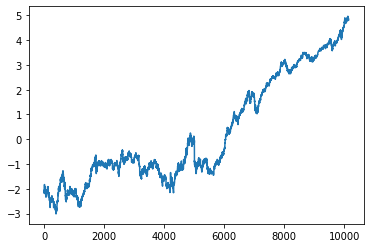

In [71]:
df["Close"].plot()

In [72]:
decomposer = FastICA(n_components=10)

In [73]:
WINDOW_SIZE = 30
sections = list(df["Close"].rolling(WINDOW_SIZE))
sections = list(filter(lambda x: len(x) == WINDOW_SIZE, sections))
sections = np.array(sections)

In [74]:
TRAIN_LOC = 9900

In [75]:
# z transform
z_sections = []

for section in sections:
    z_sections.append((section - section.mean()) / section.std())

z_sections = np.array(sections) # np.array(z_sections) #

In [76]:
z_sections.min()

-3.0137536881518097

In [77]:
z_sections.shape

(10109, 30)

In [78]:
signals = decomposer.fit_transform(z_sections[:TRAIN_LOC])

In [79]:
np.mean((z_sections[:TRAIN_LOC] - decomposer.inverse_transform(signals)) ** 2)

0.0002534321609153097

In [80]:
np.mean((z_sections[TRAIN_LOC:] - decomposer.inverse_transform(decomposer.transform(z_sections[TRAIN_LOC:]))) ** 2)

0.0001528317051663235

In [81]:
np.max(z_sections)

4.96396291383859

In [82]:
z_sections[:TRAIN_LOC][-1]

array([4.11406549, 4.04847515, 4.0270021 , 4.12260804, 4.11708407,
       4.16836921, 4.12608546, 4.15422379, 4.15218096, 4.09812908,
       4.11467806, 4.10020239, 4.18384243, 4.17219252, 4.1974651 ,
       4.20465528, 4.22409277, 4.27336201, 4.26419279, 4.27210715,
       4.25844553, 4.23747038, 4.20607225, 4.23446879, 4.23058582,
       4.25904652, 4.25975311, 4.24341087, 4.27572822, 4.29660486])

In [83]:
decomposer.inverse_transform([signals[-1]])

array([[4.06873193, 4.07378952, 4.08089839, 4.09504151, 4.1172992 ,
        4.14107913, 4.15487671, 4.15127811, 4.13355794, 4.11489029,
        4.10970106, 4.12348701, 4.15025296, 4.17811406, 4.19934437,
        4.21510828, 4.2314648 , 4.25099795, 4.26813056, 4.27323899,
        4.2616804 , 4.23948739, 4.2202589 , 4.21589544, 4.22819568,
        4.24871726, 4.26587796, 4.27373224, 4.27508204, 4.27638402]])

In [84]:
signals.shape

(9900, 10)

In [85]:
import matplotlib.pyplot as plt

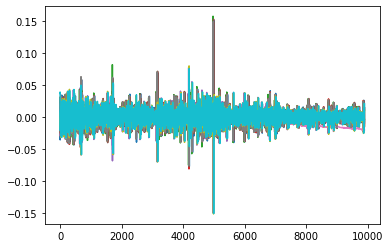

In [86]:
plt.plot(signals)

estimated ROT -0.004195655080211528
Max comp diff 0.09093975391191961
Mean comp diff -2.2465368272073806e-06 (std: 0.005877797175746921)
Mean abs comp diff 0.004194045968534736 (std: 0.0041180678843316465)


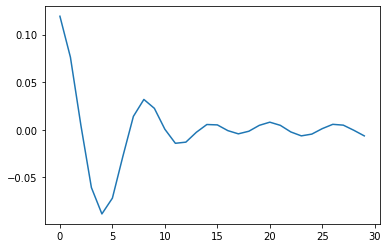

estimated ROT 0.0006700258660260425
Max comp diff 0.0643688814478965
Mean comp diff -1.4456658306176392e-06 (std: 0.005747900847770882)
Mean abs comp diff 0.004129964930707126 (std: 0.003997718839148671)


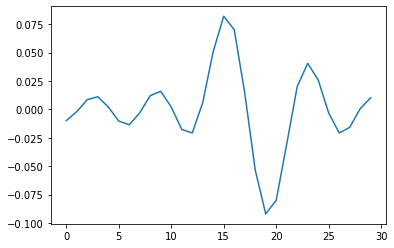

estimated ROT -0.004010279224812207
Max comp diff 0.06899833698693121
Mean comp diff -2.374128230793553e-07 (std: 0.005547568002444179)
Mean abs comp diff 0.003915082975396981 (std: 0.003930348088129607)


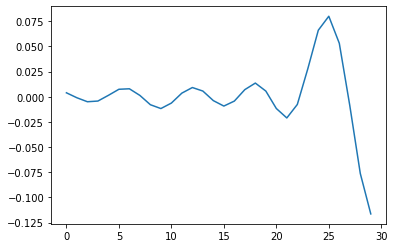

estimated ROT -0.00043187665496616023
Max comp diff 0.06796695316588905
Mean comp diff -3.0319816872925373e-06 (std: 0.0060123519683222305)
Mean abs comp diff 0.004324620869501012 (std: 0.004176845666166928)


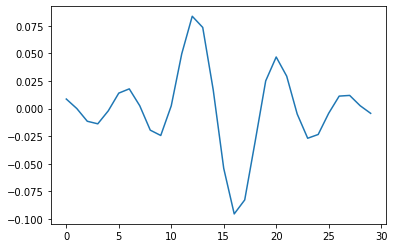

estimated ROT -0.0016351736527379702
Max comp diff 0.05966001581557792
Mean comp diff -5.009032222101368e-07 (std: 0.005618361663394838)
Mean abs comp diff 0.004012164183590095 (std: 0.003933004779494386)


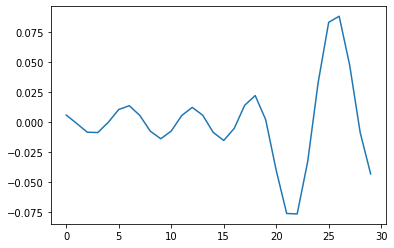

estimated ROT -0.0008993449032207306
Max comp diff 0.06723298712595407
Mean comp diff 3.5681397097296614e-06 (std: 0.006105381849411817)
Mean abs comp diff 0.004390877095405511 (std: 0.004242157303989505)


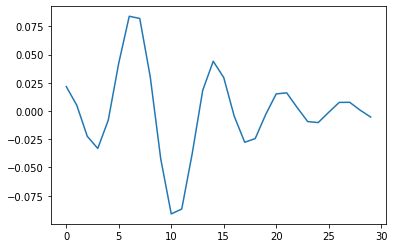

estimated ROT -0.000157838469818505
Max comp diff 0.0022746029559882856
Mean comp diff -3.0661102348938428e-06 (std: 0.0001498790178244279)
Mean abs comp diff 0.00010544675421523861 (std: 0.00010655563355101766)


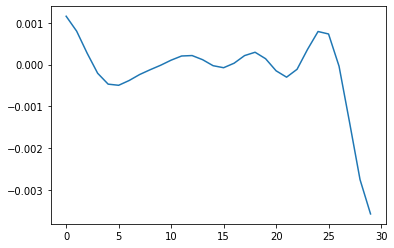

estimated ROT -0.0009210634196275082
Max comp diff 0.06199748268519595
Mean comp diff 1.1533982429896532e-06 (std: 0.005734186687485151)
Mean abs comp diff 0.004116215099446823 (std: 0.003992201341659188)


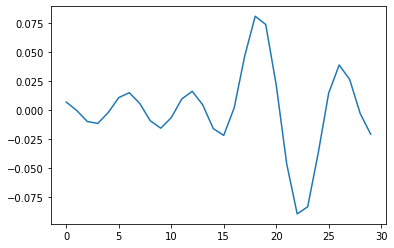

estimated ROT -0.0006612973363930452
Max comp diff 0.06851556342232774
Mean comp diff 1.3873909233769755e-06 (std: 0.006057669997322063)
Mean abs comp diff 0.004353436553494873 (std: 0.004212239059693092)


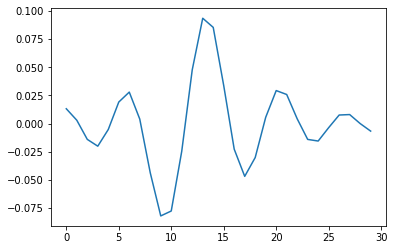

estimated ROT -0.0012137535494447518
Max comp diff 0.06081841048650885
Mean comp diff -2.951761355175653e-06 (std: 0.005618184920828331)
Mean abs comp diff 0.004042417195813786 (std: 0.003901650129433309)


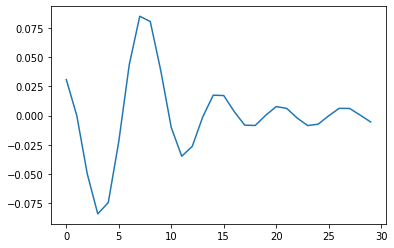

In [87]:
for i, component in enumerate(decomposer.components_):
    print(f"estimated ROT {(component[-1] - component[0]) / len(component)}")
    max_diff = np.abs(np.diff(signals[:,i])).max()
    mean_diff = np.diff(signals[:,i]).mean()
    std_diff = np.diff(signals[:,i]).std()
    mean_abs_diff = np.abs(np.diff(signals[:,i])).mean()
    std_abs_diff = np.abs(np.diff(signals[:,i])).std()
    print(f"Max comp diff {max_diff}")
    print(f"Mean comp diff {mean_diff} (std: {std_diff})")
    print(f"Mean abs comp diff {mean_abs_diff} (std: {std_abs_diff})")
    plt.plot(component)
    plt.show()

In [88]:
signals.shape

(9900, 10)

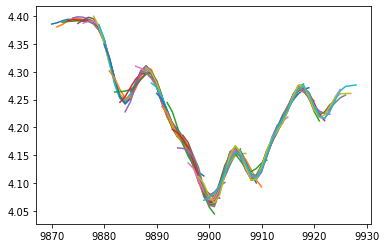

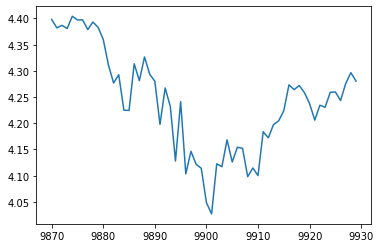

In [89]:
S = 30
for N in range(signals.shape[0]-S, signals.shape[0]):
    vec = decomposer.inverse_transform([signals[N]])[0]
    plt.plot(list(range(N, N+30)), vec)
plt.show()
plt.plot(list(range(signals.shape[0]-S, signals.shape[0]+30)), df["Close"].values[signals.shape[0]-S:signals.shape[0]+30])

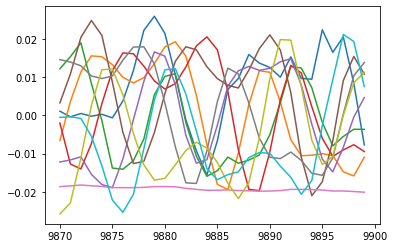

In [90]:
plt.plot(range(signals.shape[0]-S, signals.shape[0]), signals[signals.shape[0]-S:signals.shape[0]])

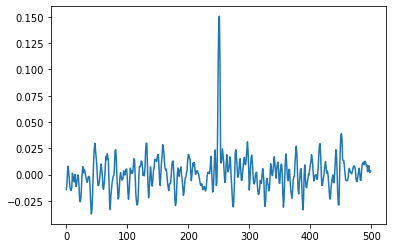

In [91]:
plt.plot(signals[4000+750:6000-750,0])

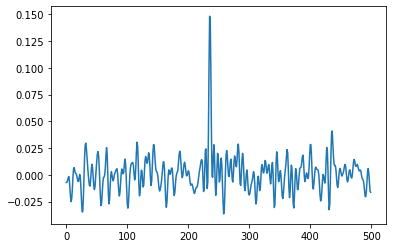

In [92]:
plt.plot(signals[4000+750:6000-750,1])

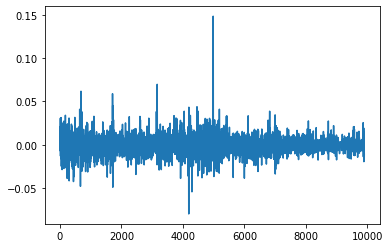

In [93]:
plt.plot(signals[:,1])

In [94]:
signals[:,1].shape

(9900,)

In [95]:
df["Close"].shape

(10138,)

In [96]:
# def sim(x, y, train=True):
#     buys = []
#     for z in enumerate(signals[:,1]):
#         if y > z:


In [97]:
# res = np.zeros((50,50))

# for i, x in enumerate(np.linspace(-1, 1, num=50)):
#     for j, y in enumerate(np.linspace(-1, 1, num=50)):
#         res[i,j] = 
